In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from matplotlib import pyplot

np.set_printoptions(suppress=True)

rushing_leaders = pd.read_csv(r'C:\Users\Logan Clark\Documents\Football Data\Rushing_Leaders_2011-2020.csv')
name_season_chart = pd.read_csv(r'C:\Users\Logan Clark\Documents\Football Data\Name_Second_Season_Chart.csv')
rookie_rushing = pd.read_csv(r'C:\Users\Logan Clark\Documents\Football Data\Rookie_Rushing_Stats_2010-2019.csv')
rookie_rushing_2020 = pd.read_csv(r'C:\Users\Logan Clark\Documents\Football Data\Rookie_Rushing_Stats_2020.csv')
second_season = pd.read_csv(r'C:\Users\Logan Clark\Documents\Football Data\Second_Season_Rushing_Stats.csv')

print(rookie_rushing)

print(second_season)

                   NAME  SEASON   TM  GP  RUSH YDS  ATT  RUSH AVG  RUSH YDS/G  \
0       Aaron Hernandez    2010   NE  14        47    3      15.7         3.4   
1           Aaron Jones    2017   GB  12       448   81       5.5        37.3   
2            Akeem Hunt    2015  HOU   7        96   17       5.6        13.7   
3          Alex Collins    2016  SEA  11       125   31       4.0        11.4   
4    Alexander Mattison    2019  MIN  13       462  100       4.6        35.5   
..                  ...     ...  ...  ..       ...  ...       ...         ...   
245       Wayne Gallman    2017  NYG  13       476  111       4.3        36.6   
246   Wendell Smallwood    2016  PHI  13       312   77       4.1        24.0   
247      William Powell    2012  ARI  13       217   60       3.6        16.7   
248           Zac Stacy    2013  STL  14       973  250       3.9        69.5   
249         Zach Zenner    2015  DET   6        60   17       3.5        10.0   

     RUSH TD  REC YDS  REC 

In [17]:
second_season = second_season.drop(columns=['SEASON', 'TM', 'GP', 'RUSH YDS', 'ATT', 'RUSH AVG',
                                            'RUSH YDS/G', 'RUSH TD', 'REC YDS', 'REC', 'TRG', 
                                            'REC AVG', 'REC YDS/G', 'REC TD'])
print(second_season)

                   NAME    STD PTs    PPR PTs
0           Aaron Jones  12.283333  14.450000
1          Alex Collins  10.133333  11.666667
2         Alfred Morris  11.081250  11.643750
3          Alvin Kamara  17.813333  23.213333
4            Cam Newton   7.668750   7.668750
5          Chris Carson  13.242857  14.671429
6   Christian McCaffrey  17.156250  23.843750
7         David Johnson  20.737500  25.737500
8      David Montgomery  14.053333  17.653333
9         Derrick Henry   7.750000   8.437500
10     Devin Singletary   6.725000   9.100000
11      Devonta Freeman  16.493333  21.360000
12           Eddie Lacy  14.662500  17.287500
13      Ezekiel Elliott  17.920000  20.520000
14      Giovani Bernard  11.146154  14.453846
15       Isaiah Crowell   7.425000   8.612500
16         James Conner  17.307692  21.538462
17            Jay Ajayi  12.686667  14.486667
18          Jeremy Hill   9.956250  10.893750
19            Joe Mixon  14.314286  17.385714
20        Jordan Howard  11.168750

In [18]:
rookie_second_merge = rookie_rushing.merge(second_season)

print(rookie_second_merge)

                   NAME  SEASON   TM  GP  RUSH YDS  ATT  RUSH AVG  RUSH YDS/G  \
0           Aaron Jones    2017   GB  12       448   81       5.5        37.3   
1          Alex Collins    2016  SEA  11       125   31       4.0        11.4   
2         Alfred Morris    2012  WAS  16      1613  335       4.8       100.8   
3          Alvin Kamara    2017   NO  16       728  120       6.1        45.5   
4            Cam Newton    2011  CAR  16       706  126       5.6        44.1   
5          Chris Carson    2017  SEA   4       208   49       4.2        52.0   
6   Christian McCaffrey    2017  CAR  16       435  117       3.7        27.2   
7         David Johnson    2015  ARI  16       581  125       4.6        36.3   
8      David Montgomery    2019  CHI  16       889  242       3.7        55.6   
9         Derrick Henry    2016  TEN  15       490  110       4.5        32.7   
10     Devin Singletary    2019  BUF  12       775  151       5.1        64.6   
11      Devonta Freeman    2

In [19]:
standard_y = (rookie_second_merge.iloc[:, 15]).to_numpy()
ppr_y = (rookie_second_merge.iloc[:, 16]).to_numpy()

print(ppr_y)

[14.45       11.66666667 11.64375    23.21333333  7.66875    14.67142857
 23.84375    25.7375     17.65333333  8.4375      9.1        21.36
 17.2875     20.52       14.45384615  8.6125     21.53846154 14.48666667
 10.89375    17.38571429 12.60625    15.68666667 20.92727273  9.24375
 10.84       12.925       9.85       23.15625    14.84166667 11.75
 19.58461538 14.2        16.325      12.35625    17.18571429 18.77692308
  9.6625     13.0875     12.5125    ]


In [20]:
X = rookie_second_merge.drop(columns=['NAME', 'SEASON', 'TM', 'STD PTs', 'PPR PTs'])

X_real = rookie_rushing_2020.drop(columns=['NAME', 'SEASON', 'TM'])

print(X)
print(X_real)

    GP  RUSH YDS  ATT  RUSH AVG  RUSH YDS/G  RUSH TD  REC YDS  REC  TRG  \
0   12       448   81       5.5        37.3        4       22    9   18   
1   11       125   31       4.0        11.4        1       84   11   11   
2   16      1613  335       4.8       100.8       13       77   11   16   
3   16       728  120       6.1        45.5        8      826   81  100   
4   16       706  126       5.6        44.1       14       27    1    1   
5    4       208   49       4.2        52.0        0       59    7    8   
6   16       435  117       3.7        27.2        2      651   80  113   
7   16       581  125       4.6        36.3        8      457   36   57   
8   16       889  242       3.7        55.6        6      185   25   35   
9   15       490  110       4.5        32.7        5      137   13   15   
10  12       775  151       5.1        64.6        2      194   29   41   
11  16       248   65       3.8        15.5        1      225   30   37   
12  15      1178  284    

In [21]:
linReg = LinearRegression().fit(X, standard_y)

linReg.predict(X_real.to_numpy())



array([13.11188172, 14.48793222,  9.70746682, 13.13251471, 12.94455459,
       11.50919391, 15.72888958, 12.49047338, 10.55641344, 13.36529004,
       11.85301624,  9.48819318, 13.25735821, 13.83250453, 13.34699898,
       12.49533526, 12.1345526 , 12.73140503, 14.52515599])

Feature: 0, Score: -0.30767
Feature: 1, Score: 0.00253
Feature: 2, Score: 0.02797
Feature: 3, Score: -0.88463
Feature: 4, Score: -0.14291
Feature: 5, Score: 0.26094
Feature: 6, Score: -0.00222
Feature: 7, Score: -0.11083
Feature: 8, Score: -0.01954
Feature: 9, Score: -0.29508
Feature: 10, Score: 0.35893
Feature: 11, Score: 0.68125


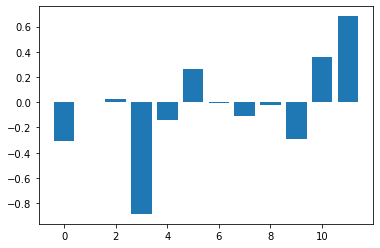

In [31]:
importance = linReg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)

labels = ["GP", "RUSH YDS", "ATT", "RUSH AVG", "RUSH YDS", "RUSH TD", "REC YDS", "REC", "TRG", "REC AVG", "REC YDS/G", "REC TD"]

pyplot.show()